Assignment 4__ 


__Problem 4 part 3__

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import membership as fuzz_mem
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

#### Defining universe for each Antecedent and Consequent

In [2]:
# Universe of Antecedent and Consequent
min_dist = 0; max_dist = 10; step_dist = 0.5;
min_angle = 0; max_angle = 90; step_angle = 1;
min_speed = 0; max_speed = 5; step_speed = 0.2;
min_turn = 0; max_turn = 90; step_turn = 1;

#### Membership function of each Antecedent and Consequent

In [3]:
# Distance membership function
distance = ctrl.Antecedent(np.arange(min_dist, max_dist+step_dist, step_dist), 'Distance from Obsctacle')
distance['Near'] = fuzz_mem.trapmf(distance.universe, [0, 0, 2, 4])
distance['Far'] = fuzz_mem.trapmf(distance.universe, [2, 4, 7, 9])
distance['Very_Far'] = fuzz_mem.trapmf(distance.universe, [7, 9, 10, 20])

In [4]:
# Angle from obstacle membership function
angle = ctrl.Antecedent(np.arange(min_angle, max_angle+step_angle, step_angle), 'Angle with obstacle')
angle['Small'] = fuzz_mem.trapmf(angle.universe, [0, 0, 10, 30])
angle['Medium'] = fuzz_mem.trapmf(angle.universe, [10, 30, 60, 80])
angle['Large'] = fuzz_mem.trapmf(angle.universe, [60, 80, 90, 90])

In [5]:
# Speed membership function
speed = ctrl.Consequent(np.arange(min_speed, max_speed+step_speed, step_speed), 'Speed')
speed['Slow_Speed'] = fuzz_mem.trapmf(speed.universe, [0, 0, 1, 1.6])
speed['Medium_Speed'] = fuzz_mem.trapmf(speed.universe, [1, 1.6, 2.8, 3.4])
speed['Fast_Speed'] = fuzz_mem.trapmf(speed.universe, [2.8, 3.4, 4.4, 5])
speed['Maximum_Speed'] = fuzz_mem.trapmf(speed.universe, [4.4, 5, 5, 5])

In [6]:
# Steering Turn membership function
st = ctrl.Consequent(np.arange(min_turn, max_turn+step_turn, step_turn), 'Steering Turn')
st['MST'] = fuzz_mem.trapmf(st.universe, [0, 0, 10, 30])
st['SST'] =  fuzz_mem.trapmf(st.universe, [10, 30, 60, 80])
st['VST'] = fuzz_mem.trapmf(st.universe, [60, 80, 90, 90])

#### Plot each Membership Function

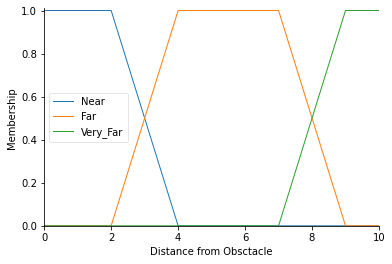

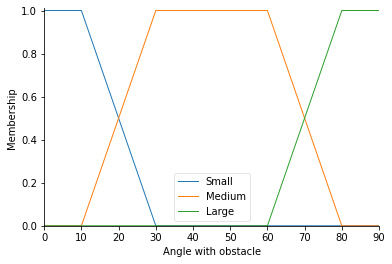

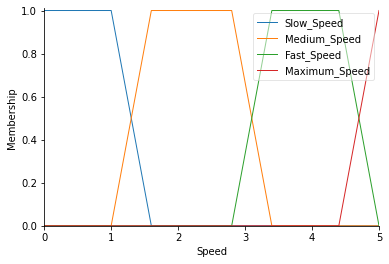

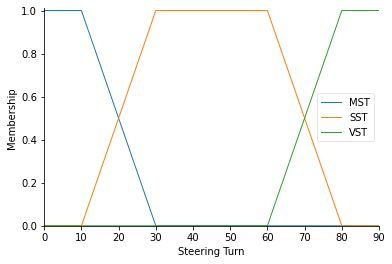

In [7]:
distance.view()
angle.view()
speed.view()
st.view()

#### Rules for the Robot navigation control system

In [8]:
# Rules for Speed
rule1 = ctrl.Rule(distance['Very_Far'] & angle['Large'], speed['Maximum_Speed'])
rule2 = ctrl.Rule(distance['Very_Far'] & angle['Medium'], (speed['Maximum_Speed'], st['MST']))
rule3 = ctrl.Rule(distance['Very_Far'] & angle['Small'], (speed['Fast_Speed'], st['MST']))
rule4 = ctrl.Rule(distance['Far'] & angle['Large'], (speed['Fast_Speed'], st['MST']))
rule5 = ctrl.Rule(distance['Far'] & angle['Medium'], (speed['Medium_Speed'], st['SST']))
rule6 = ctrl.Rule(distance['Far'] & angle['Small'], (speed['Medium_Speed'], st['SST']))
rule7 = ctrl.Rule(distance['Near'] & angle['Large'], (speed['Slow_Speed'], st['SST']))
rule8 = ctrl.Rule(distance['Near'] & angle['Medium'], (speed['Slow_Speed'], st['SST']))
rule9 = ctrl.Rule(distance['Near'] & angle['Small'], (speed['Slow_Speed'], st['VST']))

#### Simulating the robot navigation system 

In [9]:
# Applying the rules to the fuzzy Control system
robot_navigation = ctrl.ControlSystem([rule1, rule2, rule3, rule4,rule5 ,rule6, rule7, rule8, rule9])

In [10]:
# Simulating fuzzy control system
robot_nav = ctrl.ControlSystemSimulation(robot_navigation)

#### Check for different input values of Distance and Angle from obstacle

The Speed value = 0.662, when Distance from obstace is 2 and Angle with obstacle is 10 degree 
The Steering Turn angle = 79.2 degree, when Distance from obstace is 2 and Angle with obstacle is 10 degree


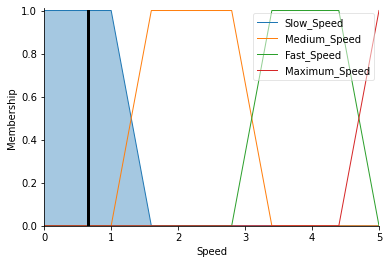

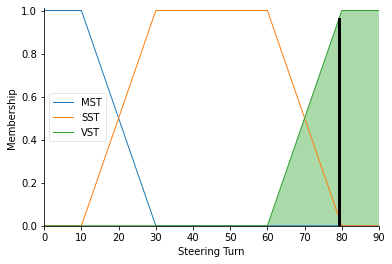

In [11]:
robot_nav.input['Distance from Obsctacle'] = 2
robot_nav.input['Angle with obstacle'] = 10

robot_nav.compute()

speed.view(sim=robot_nav)
st.view(sim=robot_nav)
print("The Speed value = {}, when Distance from obstace is 2 and Angle with obstacle is 10 degree ".format(round(robot_nav.output['Speed'], 3)))
print("The Steering Turn angle = {} degree, when Distance from obstace is 2 and Angle with obstacle is 10 degree".format(round(robot_nav.output['Steering Turn'], 1)))

As per the given input values the obstacle is very close to the robot hence we get following values
Defuzzification used is Centroid and the crisp value obtained is __speed = 0.66__ and __steering turn = 79.2 degree__ very sharp turn

We have choosen the input as __Distance = 2__ which is considered as __'Near'__ and __Angle = 10__ which is __'Small'__ we received the values for __speed as 0.66 -> 'Slow speed'__ and __steering turn as 79.2 -> 'Very sharp turn'__ this is as per set of rules.

The Speed value = 4.8, when Distance from obstace is - 10 and Angle with obstacle is 50 degree
The Steering Turn angle = 10.8, when Distance from obstace is - 10 and Angle with obstacle is 50 degree


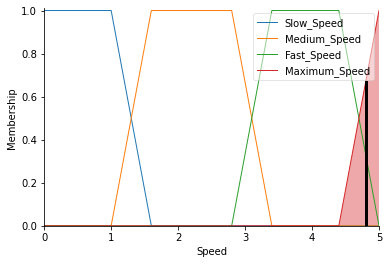

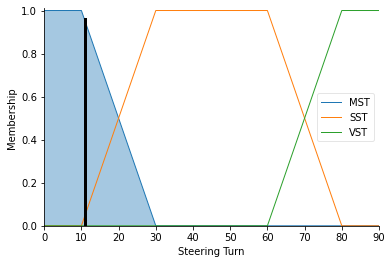

In [12]:
robot_nav.input['Distance from Obsctacle'] = 10
robot_nav.input['Angle with obstacle'] = 50

robot_nav.compute()

speed.view(sim=robot_nav)
st.view(sim=robot_nav)
print("The Speed value = {}, when Distance from obstace is - 10 and Angle with obstacle is 50 degree".format(round(robot_nav.output['Speed'], 3)))
print("The Steering Turn angle = {}, when Distance from obstace is - 10 and Angle with obstacle is 50 degree".format(round(robot_nav.output['Steering Turn'], 1)))

As per the given inputs the obstacle is far away from robot hence we get following output values
Defuzzification used is Centroid and the crisp value obtained is __Speed = 4.8__and __Steering Turn = 10.8 degree__

We have choosen the input as __Distance = 10__ which is considered as __'Very_Far'__ and __Angle = 50__ which is __'Medium'__ we received the values for __speed as 4.8 'almost Maximum speed'__ and __steering turn as 10.8 -> 'Mild steering turn'__ this is as per set of rules.

### Conclusion and Comments

__Inference Model - Mamdani__

Mamdani inference model is used as we have know set of inputs and outputs. Sugeno membership function is used when output membership function is not present. In this problem, We have mentioned the membership function for the two outputs, hence have used mamdani as the inference system, Mamdani is also used to obtain a crisp value by defuzzification whereas Sugeno calculates the output as weighted average. In terms of error criteria comparisons, "Mamdani" performs better than "Sugeno". Overall, "Mamdani" is best, due to its advantages of being intutive, having wide acceptance rate and it's well-suitedness to human input.

__Defuzzifier - Centroid__

Converting fuzzy values back to crisp values for further feed it into the system to generate an output is called as Defuzzincation. Here Centroid defuzzification is chosen as it returns the center of gravity of the fuzzy set. This defuzzification is commonly used as it provides better repeatibility of the crisp value and more robust as the center of gravity of the entire fuzzy set is considered